In [1]:
import zipfile,os
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping

Using TensorFlow backend.


In [2]:
print(tf.__version__)

2.2.0


In [3]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2020-05-26 15:36:34--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  5.09MB/s    in 61s     

2020-05-26 15:37:37 (5.01 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [0]:
#extract zip resource
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

base_dir='/tmp/rockpaperscissors/rps-cv-images'

In [0]:
#inisasi parameter image augmentation
image_augmentation = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    rotation_range=20,        
    horizontal_flip=True,
    validation_split = 0.2
)

In [6]:
#image augmentation data training dan validasi
train_generator = image_augmentation.flow_from_directory(
    base_dir,
    target_size=(200, 200),
    batch_size=32,
    class_mode = 'categorical',
    shuffle=True,
    subset='training')

validation_generator = image_augmentation.flow_from_directory(
    base_dir,
    target_size=(200, 200),
    batch_size=16,
    class_mode = 'categorical',
    shuffle=True,
    subset='validation')

Found 1751 images belonging to 3 classes.
Found 437 images belonging to 3 classes.


In [0]:
#bangun arsitektur model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(200, 200, 3)),
    MaxPooling2D(2, 2),
    Dropout(0.3),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(1024, activation='relu'),
    Dense(3, activation='softmax')
])

In [0]:
#inisiasi hyperparameter model
model.compile(loss='categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'],)

In [0]:
#inisiasi early stopping
early_stopping = [EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=5,
                          verbose=0, mode='auto')]

In [10]:
#training model
hist= model.fit(
        train_generator,
        steps_per_epoch=25,
        epochs=15,
        callbacks=early_stopping,
        validation_data=validation_generator)

Epoch 1/15
25/25 [==============================] - 118s 5s/step - loss: 14.9745 - accuracy: 0.3818 - val_loss: 1.0987 - val_accuracy: 0.3318
Epoch 2/15
25/25 [==============================] - 110s 4s/step - loss: 1.0007 - accuracy: 0.4925 - val_loss: 0.3943 - val_accuracy: 0.6156
Epoch 3/15
25/25 [==============================] - 116s 5s/step - loss: 0.7888 - accuracy: 0.6550 - val_loss: 0.5987 - val_accuracy: 0.7780
Epoch 4/15
25/25 [==============================] - 112s 4s/step - loss: 0.6380 - accuracy: 0.7688 - val_loss: 0.8007 - val_accuracy: 0.7872
Epoch 5/15
25/25 [==============================] - 111s 4s/step - loss: 0.5138 - accuracy: 0.8133 - val_loss: 0.5526 - val_accuracy: 0.8490
Epoch 6/15
25/25 [==============================] - 112s 4s/step - loss: 0.4268 - accuracy: 0.8687 - val_loss: 0.2712 - val_accuracy: 0.8558
Epoch 7/15
25/25 [==============================] - 112s 4s/step - loss: 0.3625 - accuracy: 0.8737 - val_loss: 0.0840 - val_accuracy: 0.8307
Epoch 8/15
2

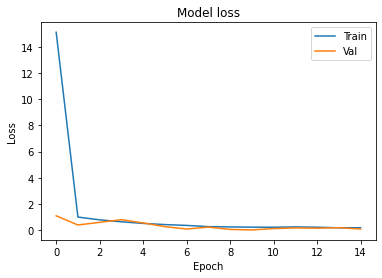

In [11]:
import matplotlib.pyplot as plt

#Plot grafik loss training dan validasi
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

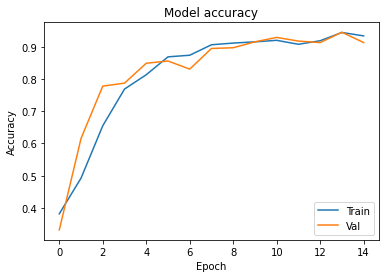

In [14]:
#Plot grafik akurasi training dan validasi
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

Saving 0CSaM2vL2cWX6Cay.png to 0CSaM2vL2cWX6Cay.png
0CSaM2vL2cWX6Cay.png
It is scissor!


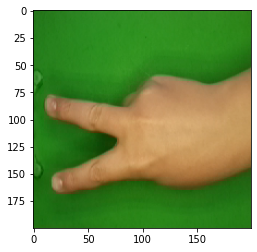

In [26]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.image as mpimg
%matplotlib inline
 
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(200,200))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  
  print(fn)
  if classes[0][0]==1.0:
    print('It is paper!')
  elif classes[0][1]==1.0 :
     print('It is rock!')
  else:
    print('It is scissor!')

Saving 00nKV8oHuTGi20gq.png to 00nKV8oHuTGi20gq.png
00nKV8oHuTGi20gq.png
It is rock!


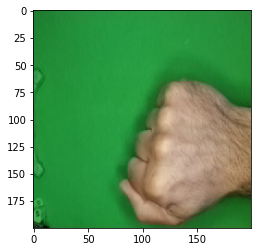

In [27]:
%matplotlib inline
 
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(200,200))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  
  print(fn)
  if classes[0][0]==1.0:
    print('It is paper!')
  elif classes[0][1]==1.0 :
     print('It is rock!')
  else:
    print('It is scissor!')

Saving 0a3UtNzl5Ll3sq8K.png to 0a3UtNzl5Ll3sq8K.png
0a3UtNzl5Ll3sq8K.png
It is paper!


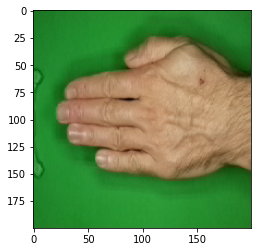

In [29]:
%matplotlib inline
 
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(200,200))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  
  print(fn)
  if classes[0][0]==1.0:
    print('It is paper!')
  elif classes[0][1]==1.0 :
     print('It is rock!')
  else:
    print('It is scissor!')